In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, precision_recall_curve

In [35]:
thresholds = {
    "VGG-Face": {"cosine": 0.40, "euclidean": 0.60, "euclidean_l2": 0.86},
    "Facenet": {"cosine": 0.40, "euclidean": 10, "euclidean_l2": 1.04}, # l2 0.80
    "Facenet512": {"cosine": 0.30, "euclidean": 23.56, "euclidean_l2": 1.04},
    "ArcFace": {"cosine": 0.68, "euclidean": 4.15, "euclidean_l2": 1.15}  # 1.13
}

In [36]:
def make_predictions(threshold, res_df):
    res_df["prediction"] = "No" #init
    idx = res_df[res_df.distance <= threshold].index
    res_df.loc[idx, 'prediction'] = 'Yes'
    return res_df

In [37]:
def calculate_metrics(results_data_frame):
    cm = confusion_matrix(results_data_frame.decision.values, results_data_frame.prediction.values)
    tn, fp, fn, tp = cm.ravel()
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    accuracy = (tp + tn)/(tn + fp +  fn + tp)
    f1 = 2 * (precision * recall) / (precision + recall)
    print(cm)
    cm_display = ConfusionMatrixDisplay(cm).plot()
    print("precision ", precision)
    print("recall ", recall)
    print("accuracy ", accuracy)
    # prec, recall, _ = precision_recall_curve(results_data_frame.decision.values, results_data_frame.prediction.values, pos_label="Yes")
    # pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
    return [precision, recall, accuracy, f1]

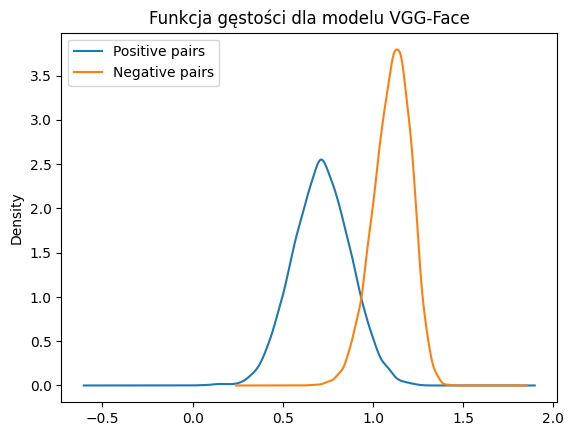

[[17709   291]
 [ 3326 14674]]
precision  0.9805546274640828
recall  0.8152222222222222
accuracy  0.8995277777777778


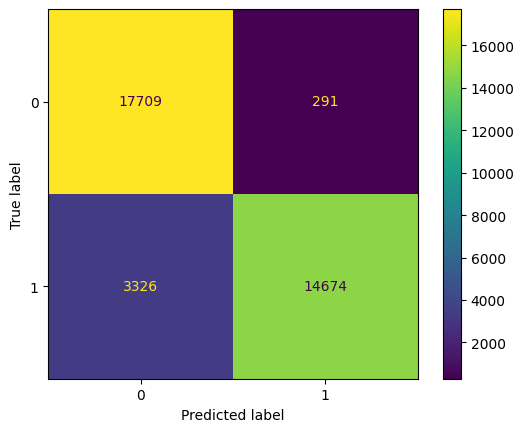

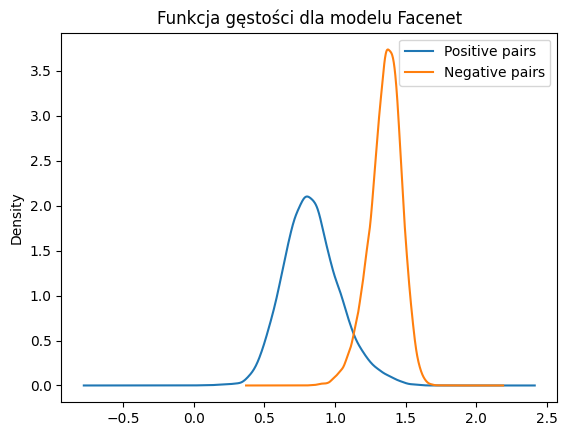

[[17819   181]
 [ 2683 15317]]
precision  0.9883210736869273
recall  0.8509444444444444
accuracy  0.9204444444444444


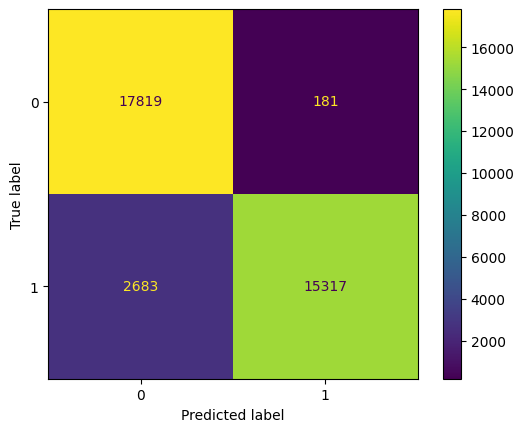

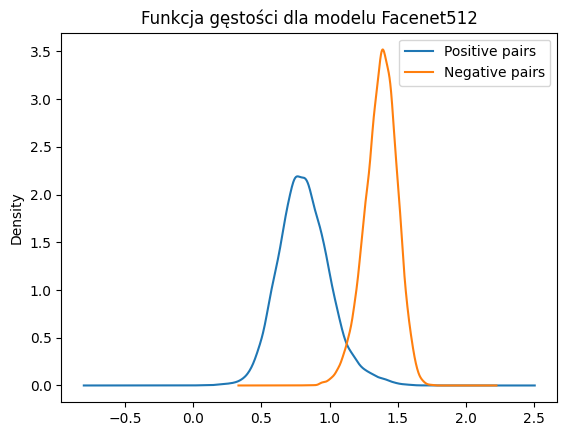

[[17878   122]
 [ 2020 15980]]
precision  0.9924233014532357
recall  0.8877777777777778
accuracy  0.9405


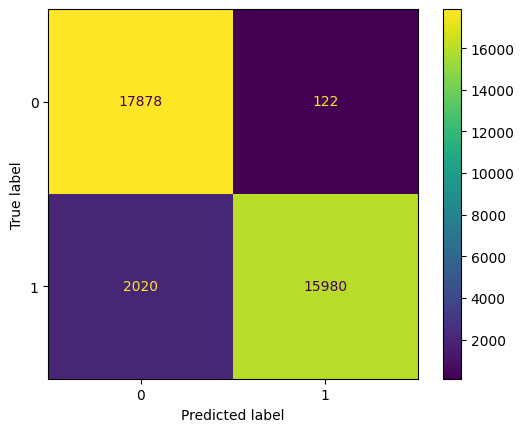

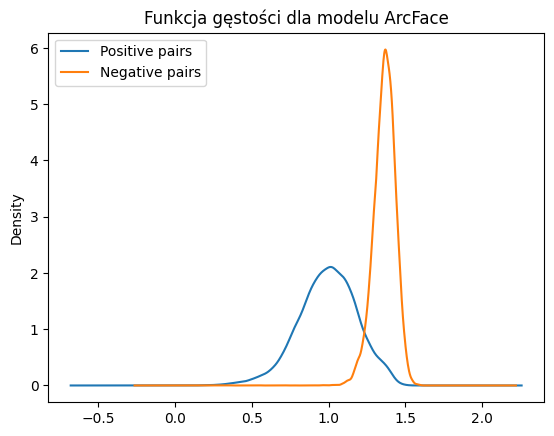

[[17894   106]
 [ 3735 14265]]
precision  0.9926240345139518
recall  0.7925
accuracy  0.8933055555555556


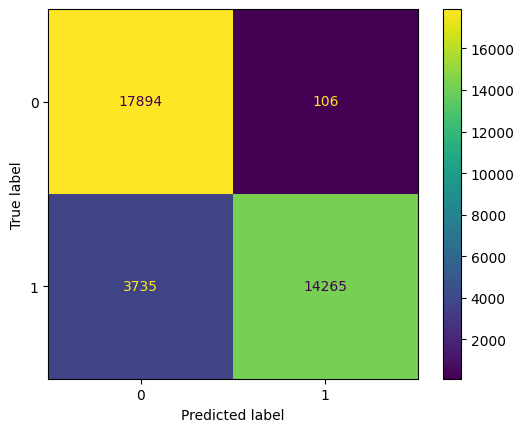

In [39]:

for selected_model in thresholds.keys():
    # selected_model = "Facenet512"
    threshold = thresholds.get(selected_model).get("euclidean_l2")
    df = pd.read_csv(f"results/result_{selected_model}.csv")
    # tp_mean = round(df[df.decision == "Yes"].distance.mean(), 4)
    # tp_std = round(df[df.decision == "Yes"].distance.std(), 4)
    # fp_mean = round(df[df.decision == "No"].distance.mean(), 4)
    # fp_std = round(df[df.decision == "No"].distance.std(), 4)
    # print("positive: ", tp_mean, tp_std)
    # print("negative: ", fp_mean, fp_std)
    # sigma = 1
    # threshold = round(tp_mean + sigma * tp_std, 4)
    # print("statistical threshold, ", sigma, " sigma ", threshold)

    plt.figure()
    df[df.decision == "Yes"].distance.plot.kde()
    df[df.decision == "No"].distance.plot.kde()
    plt.legend(["Positive pairs", "Negative pairs"])
    plt.title(f'Funkcja gęstości dla modelu {selected_model}')
    plt.grid()
    # plt.axhline(0,color='red')
    # plt.axvline(0,color='red')
    plt.axvline(threshold, color="green")
    plt.show()
    df = make_predictions(threshold, df)
    calculate_metrics(df)